In [22]:
import pandas as pd

import re #정규 표현식 활용

In [2]:
df = pd.read_excel('돈까스맛집리스트_210622_0924.xlsx', encoding='utf-8')
df.head()

음식점  망고평점  네이버평점  네이버리뷰수  다이닝코드평점  다이닝코드별점  \
0              시키카츠   4.7    NaN     NaN      NaN      NaN   
1              카와카츠   4.6   4.43   425.0     60.0      4.4   
2               오제제   4.6    NaN     NaN     43.0      4.6   
3            카츠바이콘반   4.5    NaN     NaN     59.0      4.9   
4  후니도니(르메이에르종로타운점)   4.5    NaN     NaN     59.0      4.5   

                                             다이닝코드리뷰  \
0                                                NaN   
1  ["◈ 맛집기록 #9 '카와카츠'(5.0점 / 5점 만점)- 유명한 프리미엄 돈가스...   
2  ['최근 몇년간 먹은 중에 우동과 돈까스를 가장 맛있게 먹은 곳. 가격이 별로 신경...   
3  ['11시 30분 오픈! 토요일이어서그런지 11시 전부터 대기 4팀이나 있드라구요....   
4  ['유명한이유가 있어요 치즈돈까스와 모밀이 단짠단짠마냥 맛있게느끼하고 개운하고 바삭...   

                             주소             전화        종류      가격  \
0           서울시 동대문구 회기동 60-147   02-6081-8753      까스요리  만원-2만원   
1     서울시 마포구 서교동 465-1 1F 102호  070-8801-2053      까스요리  만원-2만원   
2          서울시 용산구 동자동 43-22 1F  070-4647-4650  라멘/소바/우동   만원 미만   
3            서울시 강남구 신사동 647-22    02-547-3903      까스요리  만원-2만원   
4  서울시 종로구 종로1가 24 르메이에르종로타운 B1    02-722-5402      까스요리   만원 미만   

                                              티스토리리뷰  
0  [" 반응형(adsbygoogle = window.adsbygoogle || [])...  
1  [" 728x90 반응형(adsbygoogle = window.adsbygoogle...  
2  ['일식/돈카츠[서울역맛집] 오제제 - 용산 돈카츠 신흥강자!by 비어벨2021. ...  
3  ["내돈내산 찐맛집/동네 밖 맛집카츠바이콘반 (신사 돈까스 맛집) Multipote...  
4                                                 []

In [3]:
# series를 list로 
# 돈까스 다이닝코드 리뷰

donkatsu_dining_review = df['다이닝코드리뷰'].dropna()

donkatsu_dining_review = list(donkatsu_dining_review)
donkatsu_dining_review

['["◈ 맛집기록 #9 \'카와카츠\'(5.0점 / 5점 만점)- 유명한 프리미엄 돈가스집. 한정메뉴인 특로스카츠 정식이 인기메뉴고, 로스 정식, 히레정식, 모둠카츠 등이 있다.- 월요일 점심 11시 반 오픈에 맞춰 도착했더니 이미 거의 만석이었다. 오픈시간보다 조금 더 이른 시간에도 들어갈 수 있으니, 웨이팅이 싫다면 미리 도착해 있어야한다.- 16000원짜리 특로스카츠 정식 주문. 가브리살이 붙은 등심 부위로 만들었다. 일단 양이 상당히 많다. 심지어 밥도 리필 가능하니 양은 걱정 안해도 될 듯.- 일단 돈가스의 첫입은 환상적이었다. 육즙이 가득하고 부드러웠다. 후추를 뿌려주는 것이 특징. (뿌리기 전에 괜찮은지 주인 분이 물어봐주신다.) 물론 돈가스의 특성상 뒤로 갈수록 좀 느끼하긴 했다.- 로즈마리 오일에 살짝 찍어서 히말라야 솔트에 찍어먹는 방식이 제일 맛있었다. 샐러드도 나름 괜찮았다. - 딱히 불만족스러운 점이 없었고, 일찍 간 덕에 웨이팅도 피할 수 있었다. 혼밥하기에도 좋은 구조라 매우 좋았다.", \'총평: 이 돈까스가 대단해 우승할 만한 가게혜화의 일식 카츠로 유명한 가게는 한시간 웨이팅 후 음식 맛에 실망이 이만저만 아니었던 반면, 이곳은 한시간 웨이팅 후 음식을 맛보고 나서 두시간도 기다릴 수 있을 것 같다고 생각함재방문의사 500배, 주변인에게 망설임 없이 추천할 만한 가게\', \'브레이크타임이 끝나기 20분전쯤?줄서서 기다려서 들어간곳우리뒤로도 줄을 계속해서 섰고 평도 좋아서 기대가 되었던곳이입니다특로스카츠가 궁금했으나 품절이라고하여모둠카츠 두개를 하려다가 로스하나 히레하나를 주문했고결론적으로 모둠가츠 두개를 했으면 많이 남겼을것같아요배부름+개인적으로는 먹으면서 물리는 느낌이 있어 두명이 간다면 로스하나 히레하나 해서 먹어도 될듯우선 맛과는 별개로 안심카츠의 식감과 질감은 돈까스에서 처음 느껴보는 부드러움이었어요입에 걸리는것이 없는 입에서 풀어지는 정도의 부드러움?히말라야 핑크솔트, 로즈마리올리브유,수제돈키츠 소스가 준비되어있고 

In [4]:
donkatsu_dining_review = ' '.join(donkatsu_dining_review)
donkatsu_dining_review[:1000]

'["◈ 맛집기록 #9 \'카와카츠\'(5.0점 / 5점 만점)- 유명한 프리미엄 돈가스집. 한정메뉴인 특로스카츠 정식이 인기메뉴고, 로스 정식, 히레정식, 모둠카츠 등이 있다.- 월요일 점심 11시 반 오픈에 맞춰 도착했더니 이미 거의 만석이었다. 오픈시간보다 조금 더 이른 시간에도 들어갈 수 있으니, 웨이팅이 싫다면 미리 도착해 있어야한다.- 16000원짜리 특로스카츠 정식 주문. 가브리살이 붙은 등심 부위로 만들었다. 일단 양이 상당히 많다. 심지어 밥도 리필 가능하니 양은 걱정 안해도 될 듯.- 일단 돈가스의 첫입은 환상적이었다. 육즙이 가득하고 부드러웠다. 후추를 뿌려주는 것이 특징. (뿌리기 전에 괜찮은지 주인 분이 물어봐주신다.) 물론 돈가스의 특성상 뒤로 갈수록 좀 느끼하긴 했다.- 로즈마리 오일에 살짝 찍어서 히말라야 솔트에 찍어먹는 방식이 제일 맛있었다. 샐러드도 나름 괜찮았다. - 딱히 불만족스러운 점이 없었고, 일찍 간 덕에 웨이팅도 피할 수 있었다. 혼밥하기에도 좋은 구조라 매우 좋았다.", \'총평: 이 돈까스가 대단해 우승할 만한 가게혜화의 일식 카츠로 유명한 가게는 한시간 웨이팅 후 음식 맛에 실망이 이만저만 아니었던 반면, 이곳은 한시간 웨이팅 후 음식을 맛보고 나서 두시간도 기다릴 수 있을 것 같다고 생각함재방문의사 500배, 주변인에게 망설임 없이 추천할 만한 가게\', \'브레이크타임이 끝나기 20분전쯤?줄서서 기다려서 들어간곳우리뒤로도 줄을 계속해서 섰고 평도 좋아서 기대가 되었던곳이입니다특로스카츠가 궁금했으나 품절이라고하여모둠카츠 두개를 하려다가 로스하나 히레하나를 주문했고결론적으로 모둠가츠 두개를 했으면 많이 남겼을것같아요배부름+개인적으로는 먹으면서 물리는 느낌이 있어 두명이 간다면 로스하나 히레하나 해서 먹어도 될듯우선 맛과는 별개로 안심카츠의 식감과 질감은 돈까스에서 처음 느껴보는 부드러움이었어요입에 걸리는것이 없는 입에서 풀어지는 정도의 부드러움?히말라야 핑크솔트, 로즈마리올리브유,수제돈키츠 소스가 준비되어있고 나

In [5]:
len(donkatsu_dining_review)

26632

In [6]:
# 이모티콘 없애기

# import re

TEXT = 'donkatsu_dining_review'

EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
TEXT_refine = EMOJI.sub(r'', TEXT)

In [7]:
donkatsu_dining_review1 = donkatsu_dining_review[:5000]
donkatsu_dining_review2 = donkatsu_dining_review[5000:10000]
donkatsu_dining_review3 = donkatsu_dining_review[10000:15000]
donkatsu_dining_review4 = donkatsu_dining_review[15000:20000]
donkatsu_dining_review5 = donkatsu_dining_review[20000:25000]
donkatsu_dining_review6 = donkatsu_dining_review[25000:]


# donkatsu_dining_review1 = donkatsu_dining_review[:6000]
# donkatsu_dining_review2 = donkatsu_dining_review[6000:12000]
# donkatsu_dining_review3 = donkatsu_dining_review[12000:18000]
# donkatsu_dining_review4 = donkatsu_dining_review[18000:]

In [8]:
from konlpy.tag import Twitter

twitter = Twitter()
raw_pos_tagged1 = twitter.pos(donkatsu_dining_review1, norm=True, stem=True) # POS Tagging
raw_pos_tagged2 = twitter.pos(donkatsu_dining_review2, norm=True, stem=True) # POS Tagging
raw_pos_tagged3 = twitter.pos(donkatsu_dining_review3, norm=True, stem=True) # POS Tagging
raw_pos_tagged4 = twitter.pos(donkatsu_dining_review4, norm=True, stem=True) # POS Tagging
raw_pos_tagged5 = twitter.pos(donkatsu_dining_review5, norm=True, stem=True) # POS Tagging
raw_pos_tagged6 = twitter.pos(donkatsu_dining_review6, norm=True, stem=True) # POS Tagging


C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [11]:
raw_pos_tagged = []

for raw_reviews in [donkatsu_dining_review1, donkatsu_dining_review2, donkatsu_dining_review3, donkatsu_dining_review4]:
    raw_pos_tagged += twitter.pos(raw_reviews, norm=True, stem=True)

In [12]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

word_cleaned = []
for word in raw_pos_tagged: #  ('서울', 'Noun'),
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

['장어',
 '덮다',
 '정말',
 '맛있다',
 '정갈하다',
 '나고야',
 '덮다',
 '배부르다',
 '점심',
 '먹다',
 '싶다',
 '가면',
 '좋다',
 '깔끔하다',
 '장어',
 '정식',
 '특별하다',
 '몸보',
 '신용',
 '먹기',
 '적당하다',
 '기분',
 '좋다',
 '배부르다',
 '블로그',
 '후기',
 '평이',
 '엄청',
 '좋다',
 '기대',
 '많이',
 '그렇게',
 '특별하다',
 '건가',
 '싶다',
 '반포',
 '위치',
 '히쯔',
 '부시',
 '맛집',
 '국내',
 '민물장어',
 '일본',
 '나고야',
 '요리법',
 '접목',
 '만들다',
 '요리',
 '사이즈',
 '미니',
 '장어',
 '마리',
 '장어',
 '마리',
 '대개',
 '여성',
 '분들',
 '장어',
 '좋아하다',
 '남성',
 '분들',
 '들다',
 '숯불',
 '가득하다',
 '장어',
 '간이',
 '자다',
 '베인',
 '정말',
 '자다',
 '어울리다',
 '메뉴판',
 '명시',
 '먹다',
 '해보다',
 '색다르다',
 '맛있다',
 '특히',
 '마지막',
 '육수',
 '넣다',
 '먹다',
 '오차',
 '가장',
 '맛있다',
 '사이드',
 '메뉴',
 '정갈하다',
 '함께',
 '나오다',
 '배부르다',
 '들다',
 '같이',
 '나오다',
 '계란찜',
 '맛있다',
 '발렛',
 '가능하다',
 '어버이날',
 '아이',
 '선물',
 '점심',
 '마루',
 '예약',
 '가다',
 '해주다',
 '조용하다',
 '먹다',
 '언제',
 '가도',
 '한결같이',
 '맛있다',
 '그냥',
 '먹다',
 '맛있다',
 '말다',
 '먹다',
 '비비다',
 '먹다',
 '맛있다',
 '예전',
 '그냥',
 '요즘',
 '손님',
 '많다',
 '예약',
 '가야',
 '기다리다',
 '식사',
 '같다',
 '일본',
 '장어',
 '덮다',
 '맛있다',


In [23]:
# 리스트에 담긴 단어들을 대상으로 갯수를 세어,
# 단어를 key로 등장 횟수를 value로 하는 dict 만들기

word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic

{'장어': 29,
 '덮다': 19,
 '정말': 22,
 '맛있다': 109,
 '정갈하다': 5,
 '나고야': 4,
 '배부르다': 13,
 '점심': 6,
 '먹다': 148,
 '싶다': 24,
 '가면': 5,
 '좋다': 68,
 '깔끔하다': 10,
 '정식': 9,
 '특별하다': 6,
 '몸보': 2,
 '신용': 2,
 '먹기': 4,
 '적당하다': 14,
 '기분': 5,
 '블로그': 2,
 '후기': 2,
 '평이': 3,
 '엄청': 13,
 '기대': 4,
 '많이': 10,
 '그렇게': 4,
 '건가': 2,
 '반포': 2,
 '위치': 9,
 '히쯔': 4,
 '부시': 8,
 '맛집': 27,
 '국내': 2,
 '민물장어': 2,
 '일본': 16,
 '요리법': 2,
 '접목': 2,
 '만들다': 6,
 '요리': 4,
 '사이즈': 2,
 '미니': 3,
 '마리': 4,
 '대개': 2,
 '여성': 2,
 '분들': 10,
 '좋아하다': 5,
 '남성': 4,
 '들다': 31,
 '숯불': 2,
 '가득하다': 3,
 '간이': 4,
 '자다': 23,
 '베인': 2,
 '어울리다': 4,
 '메뉴판': 2,
 '명시': 2,
 '해보다': 5,
 '색다르다': 3,
 '특히': 6,
 '마지막': 9,
 '육수': 3,
 '넣다': 3,
 '오차': 3,
 '가장': 5,
 '사이드': 5,
 '메뉴': 20,
 '함께': 2,
 '나오다': 25,
 '같이': 7,
 '계란찜': 4,
 '발렛': 2,
 '가능하다': 7,
 '어버이날': 2,
 '아이': 2,
 '선물': 2,
 '마루': 2,
 '예약': 4,
 '가다': 27,
 '해주다': 8,
 '조용하다': 6,
 '언제': 2,
 '가도': 2,
 '한결같이': 2,
 '그냥': 18,
 '말다': 4,
 '비비다': 12,
 '예전': 3,
 '요즘': 3,
 '손님': 8,
 '많다': 23,
 '가야': 3,
 '기다리다': 7,


In [9]:
## 작업중

# 이모티콘 없애기

TEXT = 'food_dining_review'

EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
TEXT_refine = EMOJI.sub(r'', TEXT)

def food_word_cloud(food_name):
    
    df = pd.read_excel('{}.xlsx'.format(food_name), encoding='utf-8')
    
    food_dining_review = df['다이닝코드리뷰'].dropna()
    food_dining_review = list(food_dining_review)
    food_dining_review = ' '.join(food_dining_review)
    
    
    TEXT = 'food_dining_review'

    EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    TEXT_refine = EMOJI.sub(r'', TEXT)
    
    food_dining_review1 = food_dining_review[:5000]
    food_dining_review2 = food_dining_review[5000:10000]
    food_dining_review3 = food_dining_review[10000:15000]
    food_dining_review4 = food_dining_review[15000:20000]
    food_dining_review5 = food_dining_review[20000:25000]
    food_dining_review6 = food_dining_review[25000:]
    
    twitter = Twitter()
    raw_pos_tagged1 = twitter.pos(food_dining_review1, norm=True, stem=True) # POS Tagging
    raw_pos_tagged2 = twitter.pos(food_dining_review2, norm=True, stem=True) # POS Tagging
    raw_pos_tagged3 = twitter.pos(food_dining_review3, norm=True, stem=True) # POS Tagging
    raw_pos_tagged4 = twitter.pos(food_dining_review4, norm=True, stem=True) # POS Tagging
    raw_pos_tagged5 = twitter.pos(food_dining_review5, norm=True, stem=True) # POS Tagging
    raw_pos_tagged6 = twitter.pos(food_dining_review6, norm=True, stem=True) # POS Tagging

    
    raw_pos_tagged = []

    for raw_reviews in [food_dining_review1, food_dining_review2, food_dining_review3, food_dining_review4, food_dining_review5, food_dining_review6]:
        raw_pos_tagged += twitter.pos(raw_reviews, norm=True, stem=True)
        
    del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

    word_cleaned = []
    for word in raw_pos_tagged: #  ('서울', 'Noun'),
        if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
            if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
                word_cleaned.append(word[0])

    word_dic = {}

    for word in word_cleaned:
        if word not in word_dic:
            word_dic[word] = 1 # changed from "0" to "1"
        else:
            word_dic[word] += 1
    
    return word_dic

In [11]:
word_dic = food_word_cloud('돈까스맛집리스트_210622_0924')

In [12]:
word_dic.items()

dict_items([('맛집', 23), ('기록', 3), ('카츠', 32), ('5.0', 1), ('만점', 3), ('유명하다', 15), ('프리미엄', 19), ('돈가스', 41), ('한정', 1), ('메뉴인', 3), ('로스', 23), ('정식', 15), ('인기', 7), ('메뉴', 24), ('히레', 6), ('두다', 4), ('월요일', 1), ('점심', 5), ('11시', 6), ('오픈', 19), ('맞추다', 7), ('도착', 7), ('이미', 3), ('거의', 5), ('만석', 2), ('시간', 25), ('조금', 14), ('이르다', 2), ('들어가다', 11), ('웨이팅', 29), ('싫다', 1), ('미리', 6), ('야하다', 3), ('16000원', 1), ('주문', 22), ('가다', 36), ('브리', 3), ('살이', 1), ('붙다', 1), ('등심', 12), ('부위', 2), ('만들다', 8), ('일단', 7), ('상당하다', 5), ('많다', 41), ('심지어', 3), ('리필', 6), ('가능하다', 9), ('양은', 2), ('걱정', 4), ('안해', 1), ('환상', 3), ('육즙', 11), ('가득하다', 1), ('부드럽다', 31), ('후추', 1), ('뿌리다', 3), ('특징', 3), ('괜찮다', 19), ('주인', 2), ('물어보다', 4), ('주다', 11), ('물론', 4), ('특성', 1), ('갈수록', 1), ('느끼하다', 23), ('로즈마리', 3), ('오일', 2), ('살짝', 14), ('찍다', 18), ('히말라야', 5), ('솔트', 3), ('먹다', 134), ('방식', 1), ('제일', 3), ('맛있다', 108), ('샐러드', 10), ('나름', 3), ('딱하다', 2), ('불만족', 1), ('없다', 37), ('일찍', 2), ('혼밥', 3), (

In [13]:
# lambda 함수를 활용하여,
# 앞서 만든 dict를 item 단위(tuple)로 꺼내어, tuple(x)의 value(x[1])를 기준으로 하여 내림차순(reverse=True) 정렬합니다.

sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('먹다', 134),
 ('돈까스', 123),
 ('맛있다', 108),
 ('좋다', 78),
 ('고기', 50),
 ('너무', 43),
 ('돈가스', 41),
 ('많다', 41),
 ('보다', 41),
 ('나오다', 41),
 ('소스', 39),
 ('없다', 37),
 ('방문', 37),
 ('가다', 36),
 ('같다', 36),
 ('가격', 35),
 ('정도', 33),
 ('튀김', 33),
 ('카츠', 32),
 ('부드럽다', 31),
 ('생각', 30),
 ('웨이팅', 29),
 ('자다', 27),
 ('시간', 25),
 ('하나', 25),
 ('소금', 25),
 ('깔끔하다', 25),
 ('메뉴', 24),
 ('맛집', 23),
 ('로스', 23),
 ('느끼하다', 23),
 ('가게', 23),
 ('모밀', 23),
 ('치즈', 23),
 ('주문', 22),
 ('기다리다', 22),
 ('되어다', 22),
 ('바삭', 22),
 ('편이', 22),
 ('음식', 21),
 ('느낌', 21),
 ('오다', 21),
 ('우동', 20),
 ('프리미엄', 19),
 ('오픈', 19),
 ('괜찮다', 19),
 ('정말', 19),
 ('찍다', 18),
 ('추천', 18),
 ('돈카츠', 18),
 ('테이블', 17),
 ('매우', 16),
 ('유명하다', 15),
 ('정식', 15),
 ('안심', 15),
 ('사람', 15),
 ('같이', 15),
 ('식당', 15),
 ('싶다', 15),
 ('조금', 14),
 ('살짝', 14),
 ('웨이', 14),
 ('여기', 14),
 ('보이다', 14),
 ('한번', 13),
 ('좋아하다', 13),
 ('카레', 13),
 ('친절하다', 13),
 ('소바', 13),
 ('등심', 12),
 ('느끼다', 12),
 ('손님', 12),
 ('와사비', 12),
 ('특이하다', 12),
 ('진짜

In [14]:
# 내림차순 정렬된 단어 중 상위 50개를 살펴보면 다음과 같습니다.


for word, count in sorted_word_dic[:50]:
    print("{0}({1})".format(word, count), end=" ")

먹다(134) 돈까스(123) 맛있다(108) 좋다(78) 고기(50) 너무(43) 돈가스(41) 많다(41) 보다(41) 나오다(41) 소스(39) 없다(37) 방문(37) 가다(36) 같다(36) 가격(35) 정도(33) 튀김(33) 카츠(32) 부드럽다(31) 생각(30) 웨이팅(29) 자다(27) 시간(25) 하나(25) 소금(25) 깔끔하다(25) 메뉴(24) 맛집(23) 로스(23) 느끼하다(23) 가게(23) 모밀(23) 치즈(23) 주문(22) 기다리다(22) 되어다(22) 바삭(22) 편이(22) 음식(21) 느낌(21) 오다(21) 우동(20) 프리미엄(19) 오픈(19) 괜찮다(19) 정말(19) 찍다(18) 추천(18) 돈카츠(18) 

In [15]:
# WordCloud 패키지 import
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# 아래 코드에 사용 가능한 것들
#                        max_words=50, # max words
#                        prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)


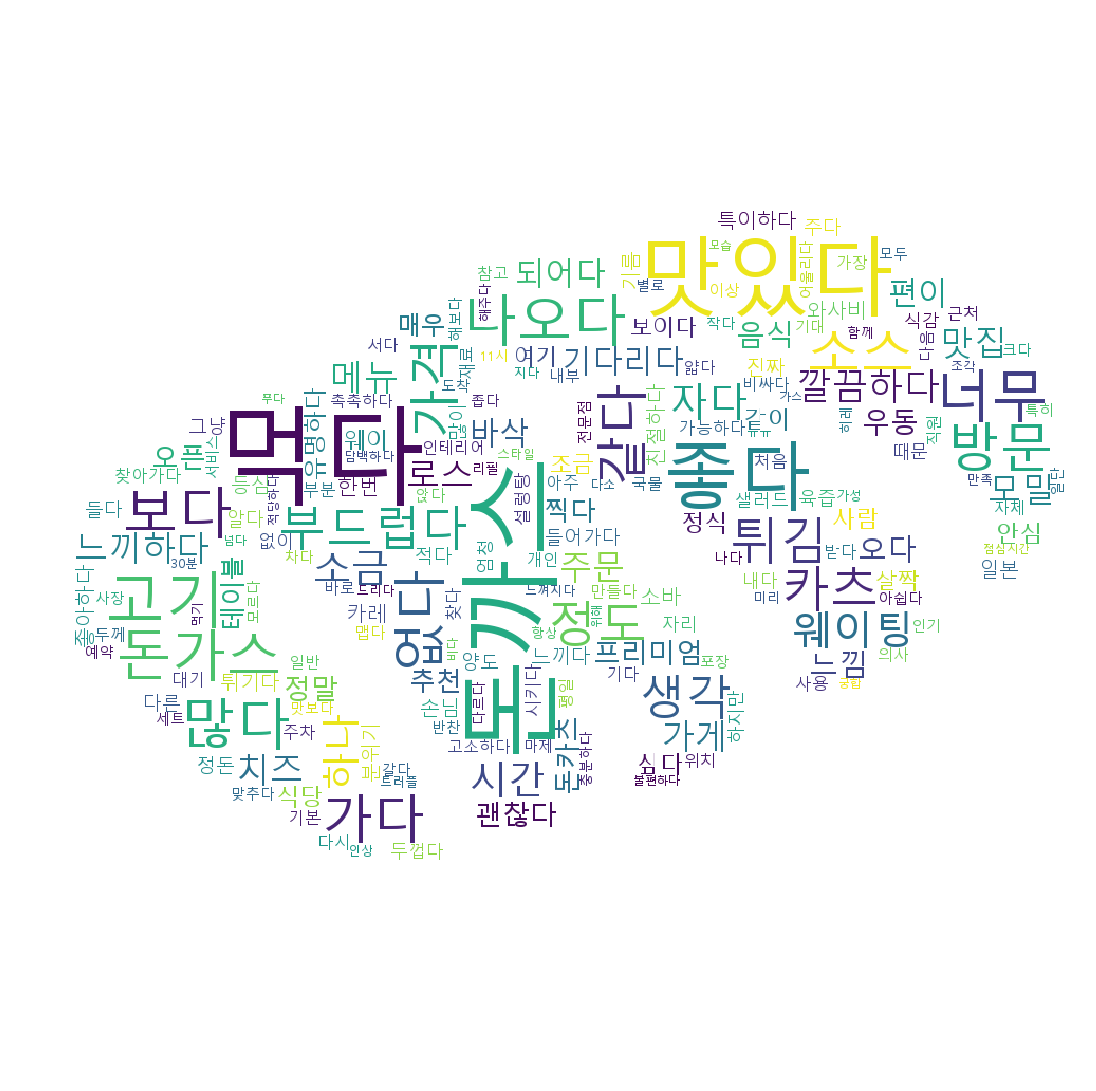

In [21]:
from PIL import Image

donkatsu_coloring = np.array(Image.open("돈까스.png"))

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
                       mask=donkatsu_coloring, # "마스크를 씌운다"라고 표현합니다. (masking)
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [19]:
# 파일 저장하기

word_cloud.to_file("돈까스 completed.png") 